# Support Vector Machine - SVM

Key Concepts & Terminology
1. Hyperplane  The Hyperplane is the decision boundary that separates the data classes.In 2D: It is a line.In 3D: It is a flat plane.Dimensions > 3: It is a hyperplane.Mathematically: $w \cdot x - b = 0$, where $w$ is the weight vector and $b$ is the bias. Anything on one side is classified as positive, and anything on the other is negative.


2. Support VectorsThese are the specific data points that lie closest to the hyperplane.Role: They are the "pillars" that support the margin. If you move other data points, the boundary doesn't change. If you move a support vector, the boundary moves.Intuition: These are the most difficult data points to classify.


3. MarginThe Margin is the distance between the hyperplane and the nearest data point (the support vectors) from either class.Goal: SVM aims to maximize this margin. A wider margin implies a more confident model that generalizes better to new data.


4. Hard Margin ClassificationHard Margin is a strict approach where the SVM demands that all training data points must be classified correctly and must lie outside the margin.Requirement: The data must be linearly separable (no noise or overlap).Weakness: It is very sensitive to outliers. A single outlier can destroy the margin or make the problem unsolvable.


6. Soft Margin ClassificationSoft Margin is a flexible approach that allows some misclassifications or margin violations in order to find a better overall boundary.Slack Variable ($\xi$): A variable added to the equation that measures the distance a point travels into the margin (the error).Benefit: It prevents overfitting and works on non-linearly separable data (real-world noisy data).


7. The $C$ HyperparameterThe parameter $C$ acts as a control knob for the Soft Margin. It determines the penalty for misclassification.High $C$: Strict penalty. The model tries hard not to miss any points. Results in a narrow margin (closer to Hard Margin behavior). Risk: Overfitting.Low $C$: Low penalty. The model accepts more errors to keep the margin wider (smoother). Risk: Underfitting.

7. Kernel TrickA mathematical technique that allows SVM to classify data that is not linearly separable (e.g., a circle of blue dots inside a ring of red dots).How it works: It projects the data into a higher-dimensional space where it becomes linearly separable, without actually calculating the coordinates in that high-dimensional space (which would be computationally expensive).Common Kernels: Linear, RBF (Radial Basis Function), Polynomial.

## Training an SVM on an `iris` dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# load dataset
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2) # class virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1,random_state=42))
svm_clf.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [9]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [10]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# I added 'hyperplane_color' and 'margin_color' arguments here
def plot_svc_decision_boundary(svm_clf, xmin, xmax, hyperplane_color='r', margin_color='b'):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # The margin is 1/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Highlight the support vectors (pink circles behind points)
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', zorder=1)

    # Plot the lines with the new colors
    # Hyperplane (center line)
    plt.plot(x0, decision_boundary, color=hyperplane_color, linestyle="-", linewidth=2, zorder=2)
    # Margins (gutters)
    plt.plot(x0, gutter_up, color=margin_color, linestyle="--", linewidth=2, zorder=2)
    plt.plot(x0, gutter_down, color=margin_color, linestyle="--", linewidth=2, zorder=2)

C:\Users\91816\AppData\Local\Temp\ipykernel_9060\110236799.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
C:\Users\91816\AppData\Local\Temp\ipykernel_9060\110236799.py:24: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


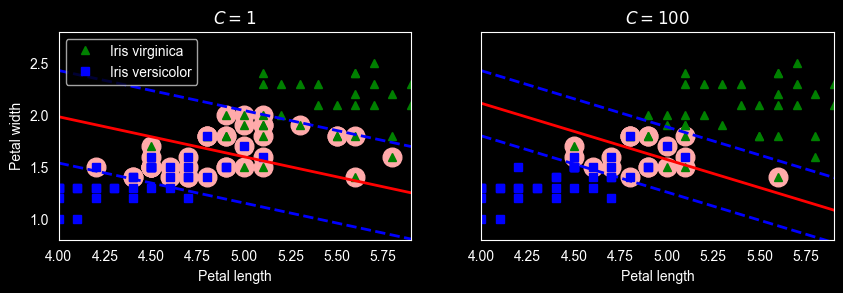

In [17]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")

plt.axis([4, 5.9, 0.8, 2.8])
plt.grid(color="k")

plt.show()

The resulting model is represented on the left in Figure

Unlike LogisticRegression, LinearSVC doesn’t have a predict_proba()
method to estimate the class probabilities. That said, if you use the SVC class
(discussed shortly) instead of LinearSVC, and if you set its probability
hyperparameter to True, then the model will fit an extra model at the end of
training to map the SVM decision function scores to estimated probabilities.

 ## Nonlinear SVM Classification


Although linear SVM classifiers are efficient and often work surprisingly
well, many datasets are not even close to being linearly separable. One
approach to handling nonlinear datasets is to add more features,